# <center> The Boston House Market Dataset </center>
### <center>Jacqueline Lee, Henry Chiang, Yousif Al-Naimi, Cynthia Lin</center>
# <center> An Analysis of Geographical and Socio-Economic Effects on House Pricing in Boston</center>

## Introduction:

This dataset, first analysed by Harrison and Rubinfeld (1978), is a dataset involving median house pricing in various small towns in the greater Boston area, with corresponding auxiliary data for each entry. This dataset was further augmented and corrected in Giley and Pace (1996) to account for the censorship error present in the original dataset, where house prices above \\$50,000 were artificially capped to \\$50,000, as well as to augment the dataset with latitude and longitude data.
    To tackle such a dataset, involving 20 variables each with 506 observations, a methodical approach was needed to isolate the variables to analyse in order to provide meaningful conclusions from this data. Our team decided on a blend of qualitative and quantitative analysis in order to provide a meaningful conclusion for our tasks.

## Initial Approach: 

The first method of classification used was to graph every variable against every other variable possible, as this helped us to get a high-level view of the data's behaviour, accomplished with the following R code.

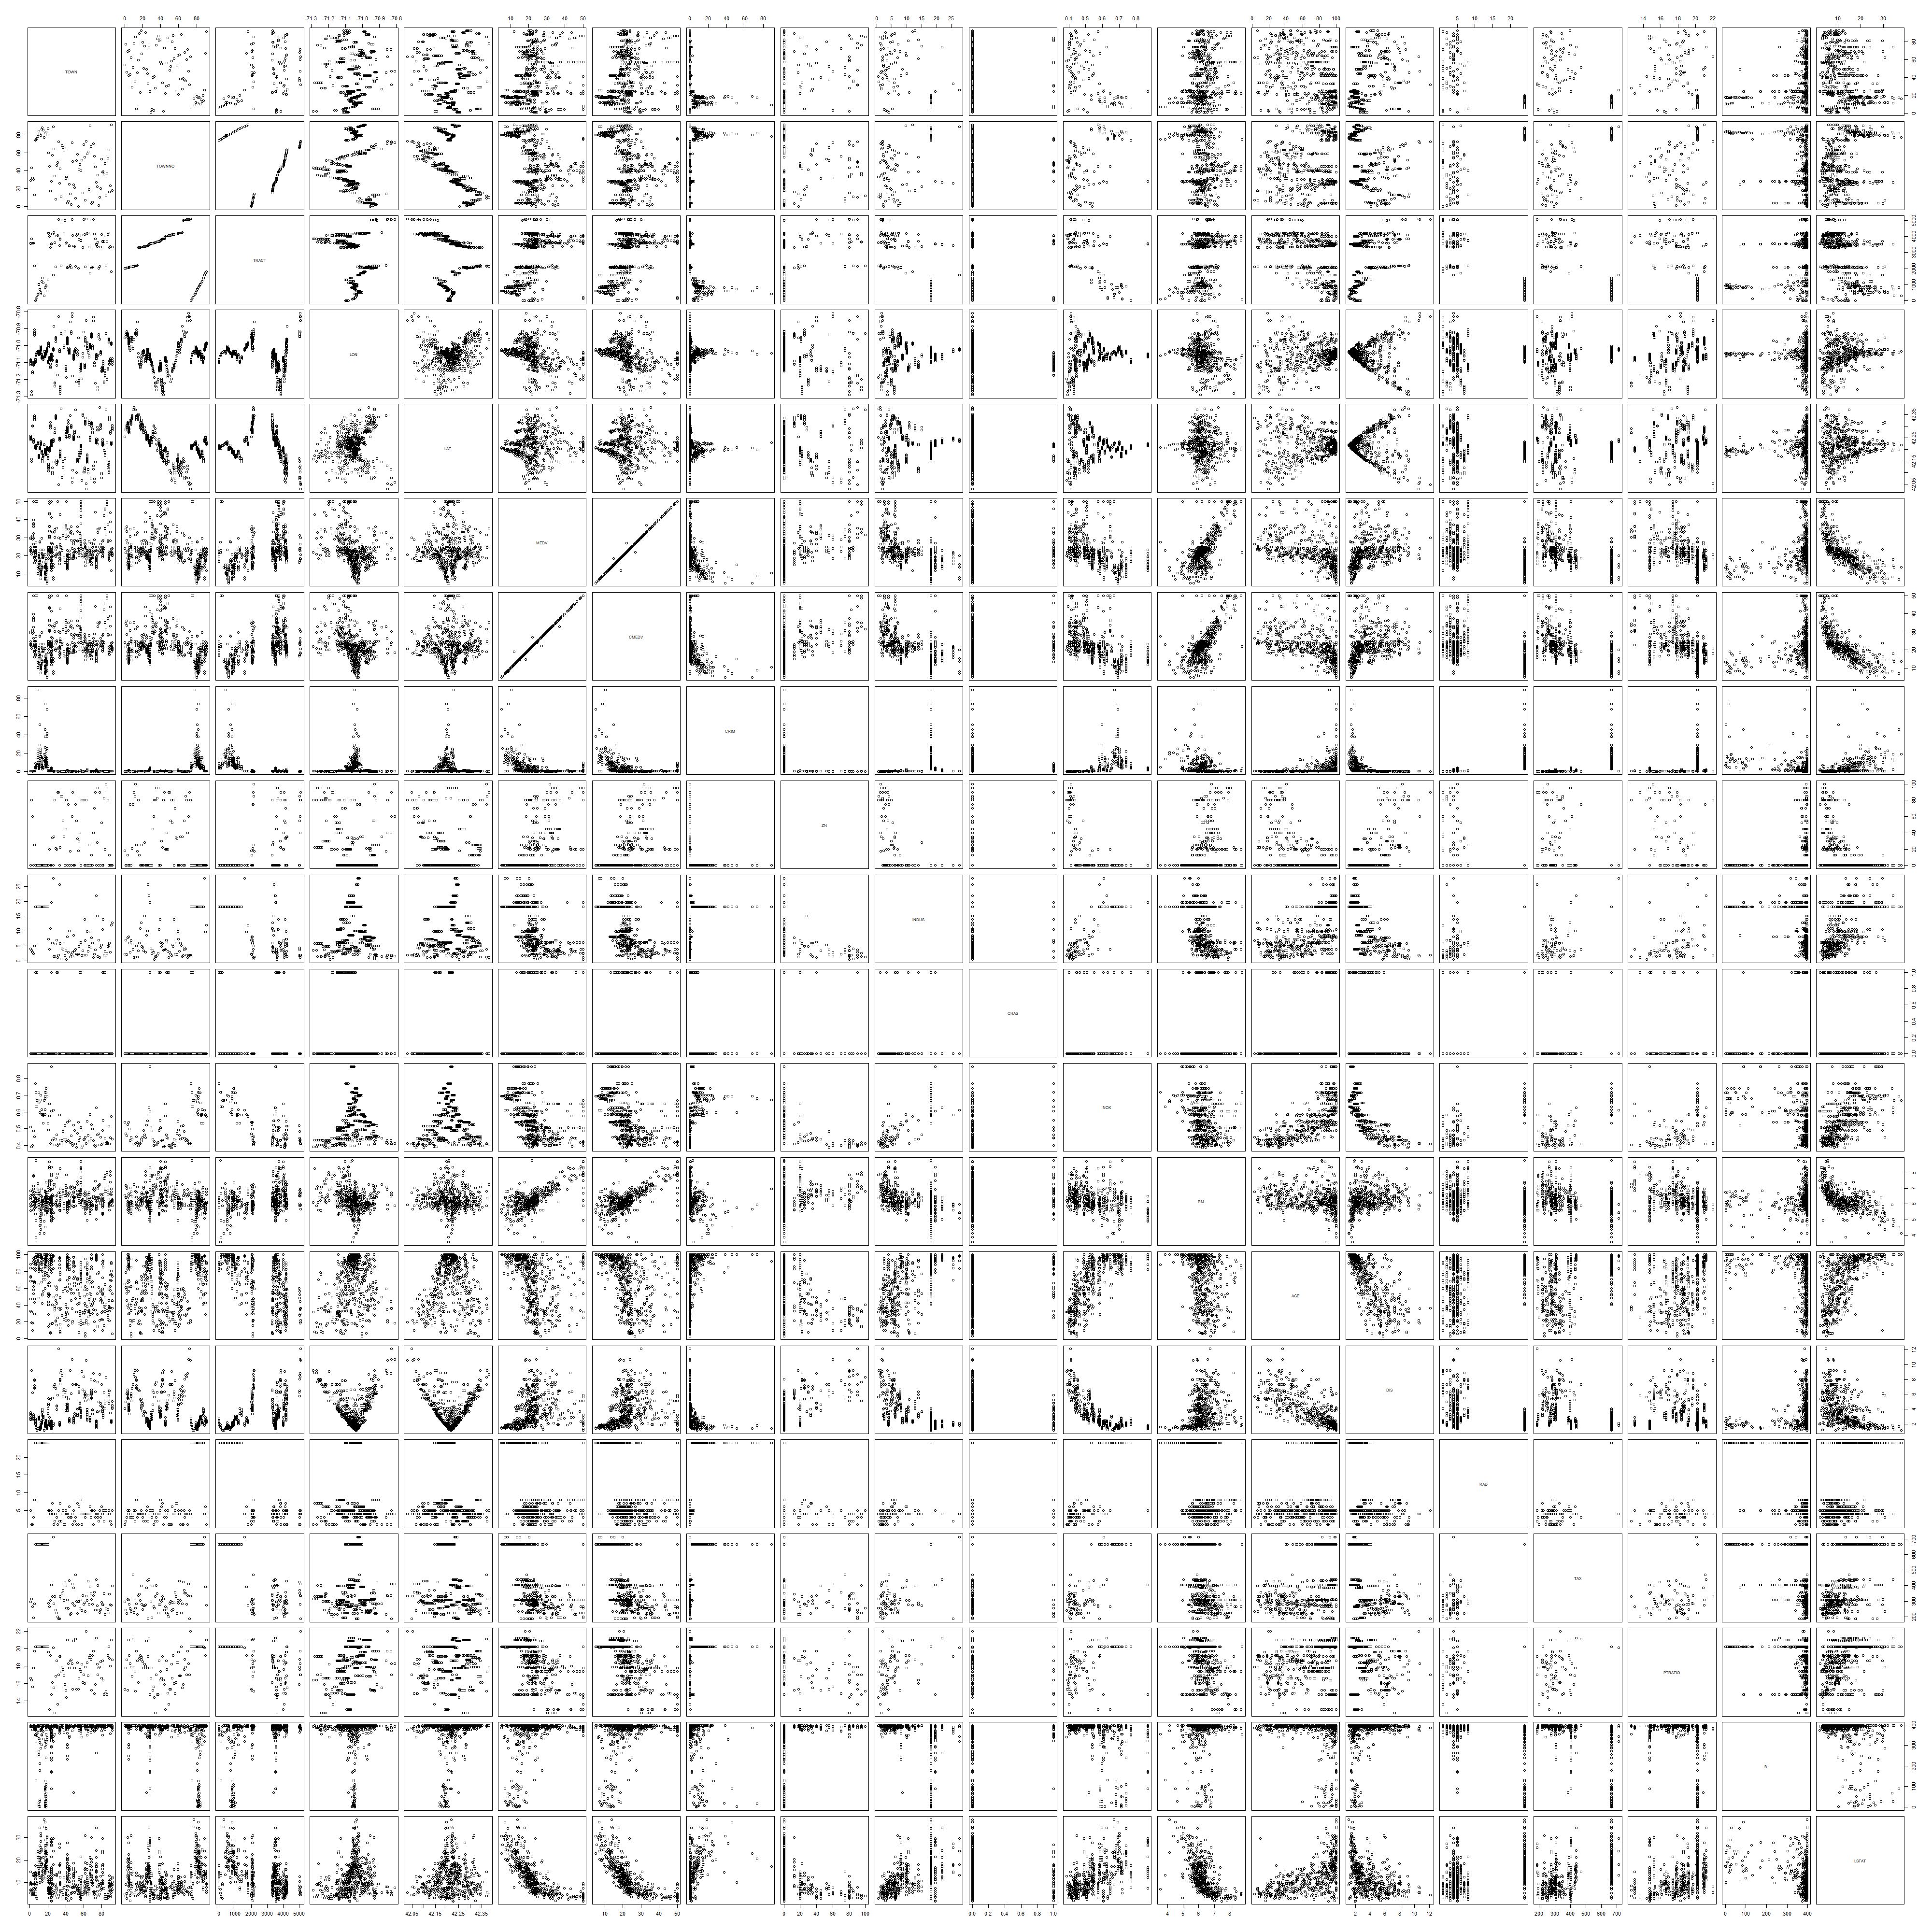

While this overview was helpful in initialising the analysis, it was not a good representation of the ideal candidates for analysis. This led onto a more quantitative result, utilising PMCC hypothesis testing on every variable pair, and selecting a low critical value of $1 \cdot 10^{-5} $ to remove any potential outliers. This resulted in a csv file listing the paired variables, their r-value, and the positivity or negativity of their correlation, accomplished with the following code:

This provided an excellent starting ground for our analysis, as it gave us a good idea of which variables may affect the price of housing in the area, and which may not.

## Geographical Analysis



In this step, we aimed to plot out geospatial data to understand the relationship between the factors that affect house pricing and their geographical locations. The map of the Massachusetts was output from a dataset found in an official website of the government [1]. 


The first graph displays riverside towns around the Charles River. By looking at the blue scatters, which represent the towns at the border of the river, we could roughly know where the river is located. The river could be an important indicator of house pricing, and we expect that property value would have a positive correlation with the river as the location of the houses is between rural and urban areas.

<img src="Data/Graph/Capture4.JPG" style="width: 500px;"/>

Pupil-teacher ratios show the distribution of educational resources, which could indirectly indicate where the city centre is. The ratios in the area around 71.1°W, 42.4 °E seem to be relatively higher. We could infer that there are more people residing in that region and the area would also be more prosperous.  

<img src="Data/Graph/Capture2.JPG" style="width: 500px;"/>

The price of houses located in towns with high crime rates was expected to be lower. As it can be seen in the graph, relatively dangerous towns are dense in the area around 71.1°W, 42.4 °E.  By looking at the previous graph, it is reasonable to see that the crime rates are higher in that region since the number of residents is also higher.

<img src="Data/Graph/Capture1.JPG" style="width: 500px;"/>

Both the crime rate and the amount of nitric oxide concentration are negative indicators of house pricing. The graph below indicates nitric oxide concentration (units: parts per 10 million) per town in different areas. The areas which have relatively higher nitric oxide concentration seem to overlap with those with comparatively higher crime rates.

<img src="Data/Graph/Capture3.JPG" style="width: 500px;"/>

The last part of the section was to display owner-occupied housing prices measured in USD 1000. To classify the data more precisely, we plotted out the range of housing prices from minimum to maximum and used the quartiles to sort the whole dataset into four classifications. The dashed lines in the graph were the first, the second and the third quartiles of the dataset. 

<img src="Data/Graph/The range of owner-occupied housing.png" style="width: 400px;"/>

From the previous graph, we could see that the house prices are rising shapely after the third quartiles, which means their prices are significantly higher than others. Then, from graph of the housing prices in different areas below, the corresponding region which houses are more expensive is that in golden colour.

<img src="Data/Graph/Capture6.JPG" style="width: 500px;"/>

[1] MassDoc Pilot(2021)MassGIS Data: State Outlines. Available at: https://docs.digital.mass.gov/dataset/massgis-data-state-outlines

## Reduction of Components via PCA and t-SNE

The next step was to understand if some intuitive guesses supported by the PMCC Hypothesis testing were well-correlated with each other. The first set of variables tested were proportions of crime ("CRIM" in the dataset), the proportion of land in the town occupied by non-retail businesses ("INDUS"), and the percentage values of lower status population ("LSTAT"). Using the following code to analyse the data via PCA, we obtain a two-dimensional representation of these three variables.

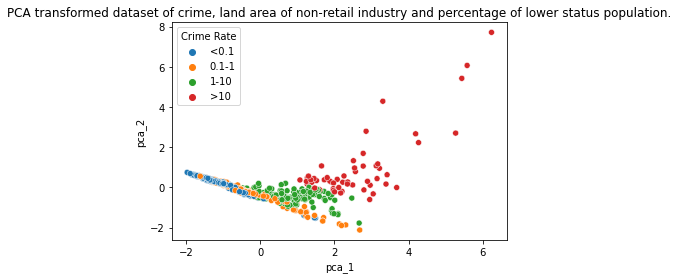

As we can see from the graph, there are clear separated values in the PCA graph, separated by the classes of intervals in crime statistics, however due to the limitations of PCA, the distances between the low values of crime (<0.1 and 0.1-1) are very close together and not clearly distinguishable. To overcome this, we can use t-SNE to warp this further with custom parameters in order to show the correlation more clearly, accomplished with the following code:

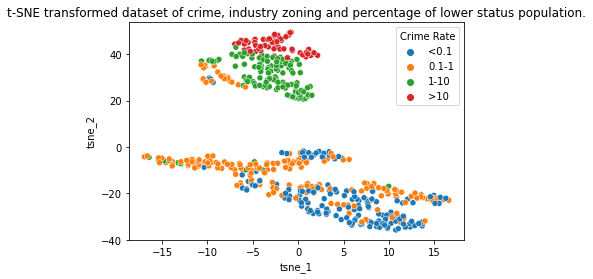

This graph shows the data in a much clearer fashion, as the classes are more separated out, however due to the number of nearby points in the range close to 1, there is significant overlap between the blue and orange dots, though this is significantly less present in the larger intervals, as the diffirences scale roughly exponential, leading to a clearer display of classes. The separation of these classes suggests a correlation between these three variables, indicating that the response variable, "CRIM", shows a correlation with an increase in industrial land usage and lower status population. Intuitively, this is a reasonable conclusion, as the increase in industrial land usage and lower status population would potentially imply a lower income and more difficult living conditions, while still being in the city outskirts, likely leading to an increase in crime.

A similar process may be followed for the other data, using PCA or t-SNE where appropriate in the following graphs:

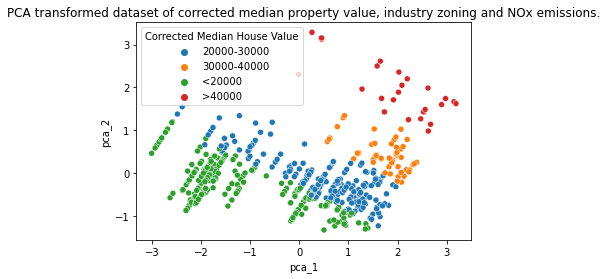

As we can see, this dataset is very well partitioned by class in this PCA graph, indicating that the corrected median property value is strongly correlated with the proportion of non-retail industrial land usage and NOx emissions. This would intuitively be expected, as heavy industry will tend to make significant noise from the road traffic and industry buildings themselves, and similarly NOx emissions, which tend to come from road traffic, would be higher near these areas and further discourage people to move to these areas, thus introducing a loss in price.

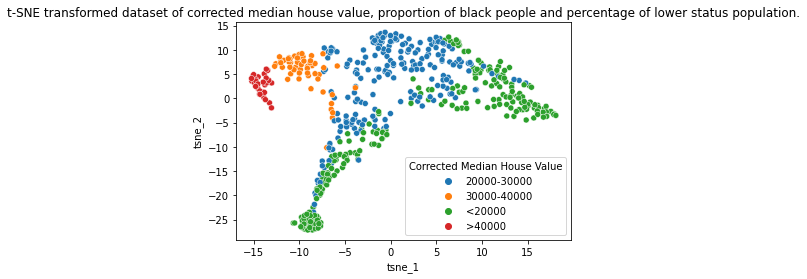

Another important factor to consider is the racial bias likely present in this data, especially considering the time frame in which this data was collected, being in the 1970s, relatively soon after Civil Rights movements occurred in the US. This would imply that, on average, the black population of Boston would be of lower status, thus reducing house prices, and furthered by the stigma introduced by racial bias, the prices would further be driven down. This can be seen  by the relatively clear segmenting of data, especially at the high end of house prices, where there is very little overlap between house value intervals.

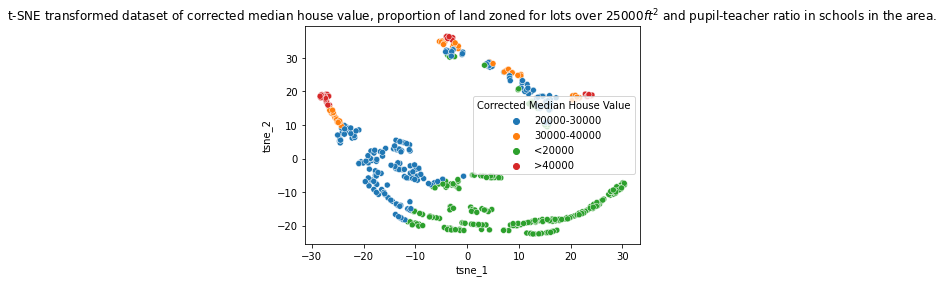

This was a somewhat unexpected correlation to find, given the unexpected effect of zoning laws on house prices, although the pupil-teacher ratio acts as a rough indication of school quality, a pull factor to a neighbourhood with one of these schools present. The classification in this dataset is relatively clear, indicating a correlation between these properties, as supported by the PMCC data. An explanation for the two distinct segments in this graph could be significant number of towns in the Boston area with no zoning laws, likely due to the large variance in settlement kind in this dataset, varying from the large city of Boston to small towns in the same South-Eastern part of the state.

The above graphs help to interpret variables and their relationship with each other and the corrected median house price, allowing for a clearer understanding of the regression algorithms developed.

## Linear Regression Model

After Exploratory data analysis, we decided to build a model predicting price of housing. Our first appraoch is to build a model with all covariates

In [1]:
#read the data
dat<-read.csv("Data/boston_corrected_raw.csv")
data1<-dat[,-c(1,6)] #remove TOWN, MEDV
str(data1)

'data.frame':	506 obs. of  18 variables:
 $ TOWNNO : int  0 1 1 2 2 2 3 3 3 3 ...
 $ TRACT  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ LON    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ LAT    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ CMEDV  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ L

In [2]:
#Initial model with all covariates
m0<-lm(CMEDV~., data = data1)
summary(m0)


Call:
lm(formula = CMEDV ~ ., data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.0678  -2.7157  -0.5614   1.6559  25.6815 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.591e+02  4.132e+02  -0.385 0.700464    
TOWNNO      -7.162e-03  1.817e-02  -0.394 0.693633    
TRACT       -7.425e-04  4.578e-04  -1.622 0.105461    
LON         -4.983e+00  3.487e+00  -1.429 0.153619    
LAT         -3.700e+00  7.547e+00  -0.490 0.624178    
CRIM        -1.048e-01  3.260e-02  -3.216 0.001388 ** 
ZN           4.507e-02  1.387e-02   3.249 0.001240 ** 
INDUS        1.322e-02  6.179e-02   0.214 0.830639    
CHAS         2.519e+00  8.653e-01   2.911 0.003770 ** 
NOX         -1.652e+01  4.042e+00  -4.086 5.13e-05 ***
RM           3.801e+00  4.177e-01   9.100  < 2e-16 ***
AGE          1.582e-03  1.361e-02   0.116 0.907508    
DIS         -1.426e+00  2.193e-01  -6.505 1.93e-10 ***
RAD          2.264e-01  8.419e-02   2.689 0.007402 ** 
TAX        

The model with all covaraites, m0, has r-squred 0.74%, which means around 74% of the variation in data is explained by the model.
Now we try to build a second model (m1), which only uses the covaraites that has higher correlation with housing prices, as stated in the PCA section previosuly. (INDUS, CRIM, LSTAT, NOX, and B)

In [3]:
#pick varaibles have strong correlation with CMEDV (INDUS, CRIM, LSTAT, NOX, and B)
m1<-lm(CMEDV~INDUS+CRIM+LSTAT+NOX+B, data=dat)
summary(m1)


Call:
lm(formula = CMEDV ~ INDUS + CRIM + LSTAT + NOX + B, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.967  -3.858  -1.325   2.235  25.241 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.629309   2.256570  12.687   <2e-16 ***
INDUS       -0.135862   0.064515  -2.106   0.0357 *  
CRIM        -0.054552   0.037427  -1.458   0.1456    
LSTAT       -0.892941   0.051403 -17.371   <2e-16 ***
NOX          8.285411   3.812942   2.173   0.0303 *  
B            0.006483   0.003376   1.920   0.0554 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.119 on 500 degrees of freedom
Multiple R-squared:  0.5603,	Adjusted R-squared:  0.5559 
F-statistic: 127.4 on 5 and 500 DF,  p-value: < 2.2e-16


The second model(m1) only has r-squred of 0.56, which particularly due to we only uses limited covariates, and 2.there're some covariates that are not linearly related to housing prices
After inspecting the plot of each covariates aganist housing prices, we build the third model(m2) with more covariates.

In [4]:
#pick varaibles have strong correlation with CMEDV 
m1<-lm(CMEDV~TRACT+TOWNNO+RM+NOX+LSTAT+PTRATIO+TAX+INDUS+CRIM+LSTAT+B, data=dat)
summary(m1)


Call:
lm(formula = CMEDV ~ TRACT + TOWNNO + RM + NOX + LSTAT + PTRATIO + 
    TAX + INDUS + CRIM + LSTAT + B, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8586  -2.9059  -0.8251   1.6795  28.8471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.3561082  5.2490272   4.450 1.06e-05 ***
TRACT       -0.0012067  0.0003054  -3.951 8.92e-05 ***
TOWNNO       0.0196987  0.0123871   1.590 0.112414    
RM           4.7752488  0.4217288  11.323  < 2e-16 ***
NOX         -4.9889684  3.4358665  -1.452 0.147128    
LSTAT       -0.5163831  0.0509228 -10.141  < 2e-16 ***
PTRATIO     -1.0904388  0.1362796  -8.001 8.80e-15 ***
TAX         -0.0089059  0.0033907  -2.627 0.008893 ** 
INDUS        0.1232483  0.0606465   2.032 0.042662 *  
CRIM        -0.0607742  0.0340966  -1.782 0.075294 .  
B            0.0095121  0.0028456   3.343 0.000892 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.063

The r-squred is better in m1 as we using more covariates. However, in the initial stage of analysis, we've noticed that some of covariates are not linearly related to the housing prices. Therefore we build the third model to incoperates appropriate transformations on specific variables.

In [5]:
m2<-lm(CMEDV~log(CRIM)+RM+INDUS+NOX+log(LSTAT)+
         TAX+I(1/DIS)+I(B^2), data=dat)
summary(m2)


Call:
lm(formula = CMEDV ~ log(CRIM) + RM + INDUS + NOX + log(LSTAT) + 
    TAX + I(1/DIS) + I(B^2), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1714  -2.6512  -0.4177   2.2034  21.0333 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.559e+01  3.931e+00   6.510 1.84e-10 ***
log(CRIM)    2.985e-01  2.102e-01   1.420  0.15617    
RM           3.652e+00  3.880e-01   9.413  < 2e-16 ***
INDUS       -6.819e-02  5.361e-02  -1.272  0.20394    
NOX         -1.129e+01  3.583e+00  -3.151  0.00172 ** 
log(LSTAT)  -9.608e+00  5.473e-01 -17.555  < 2e-16 ***
TAX         -1.071e-02  2.233e-03  -4.799 2.11e-06 ***
I(1/DIS)     1.866e+01  2.147e+00   8.693  < 2e-16 ***
I(B^2)       1.377e-05  5.586e-06   2.466  0.01402 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.477 on 497 degrees of freedom
Multiple R-squared:  0.766,	Adjusted R-squared:  0.7622 
F-statistic: 203.4 on 8 and 497 DF,

The r-squred significantly improved from 0.702 to 0.766 in m2. However, we wonder if there's extra useful information that can be extracted from the covariates we didn't consider before, especially those having low correlation with all variables. 
Thus we build the fourth model (m3) with extra covariates: CHAS, PTRATIO, and LON 

In [6]:
m3<-lm(CMEDV~log(CRIM)+RM+INDUS+log(LSTAT)+LON+PTRATIO+NOX+CHAS+
         TAX+I(1/DIS)+I(B^2), data=dat)
summary(m3)


Call:
lm(formula = CMEDV ~ log(CRIM) + RM + INDUS + log(LSTAT) + LON + 
    PTRATIO + NOX + CHAS + TAX + I(1/DIS) + I(B^2), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1164  -2.2846  -0.2246   1.9465  21.4864 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.981e+02  2.054e+02  -2.426 0.015644 *  
log(CRIM)    3.800e-01  2.019e-01   1.882 0.060424 .  
RM           3.212e+00  3.730e-01   8.612  < 2e-16 ***
INDUS       -5.468e-02  5.236e-02  -1.044 0.296925    
log(LSTAT)  -8.897e+00  5.269e-01 -16.887  < 2e-16 ***
LON         -7.540e+00  2.877e+00  -2.621 0.009050 ** 
PTRATIO     -5.608e-01  1.162e-01  -4.828 1.84e-06 ***
NOX         -1.490e+01  3.687e+00  -4.041 6.17e-05 ***
CHAS         2.398e+00  7.760e-01   3.090 0.002115 ** 
TAX         -7.343e-03  2.195e-03  -3.345 0.000885 ***
I(1/DIS)     1.725e+01  2.044e+00   8.440 3.54e-16 ***
I(B^2)       1.591e-05  5.320e-06   2.990 0.002933 ** 
---
Signif. codes:  0 ‘***’ 0

We can see that the r-quared improved to 0.79 after including extra variables, and almost all covariates has significant p-values. The variables in the model also makes intuitively sense as mentioned in the PCA part.
Next we checked the residual plot to check if the model assumptions are satisfied. 

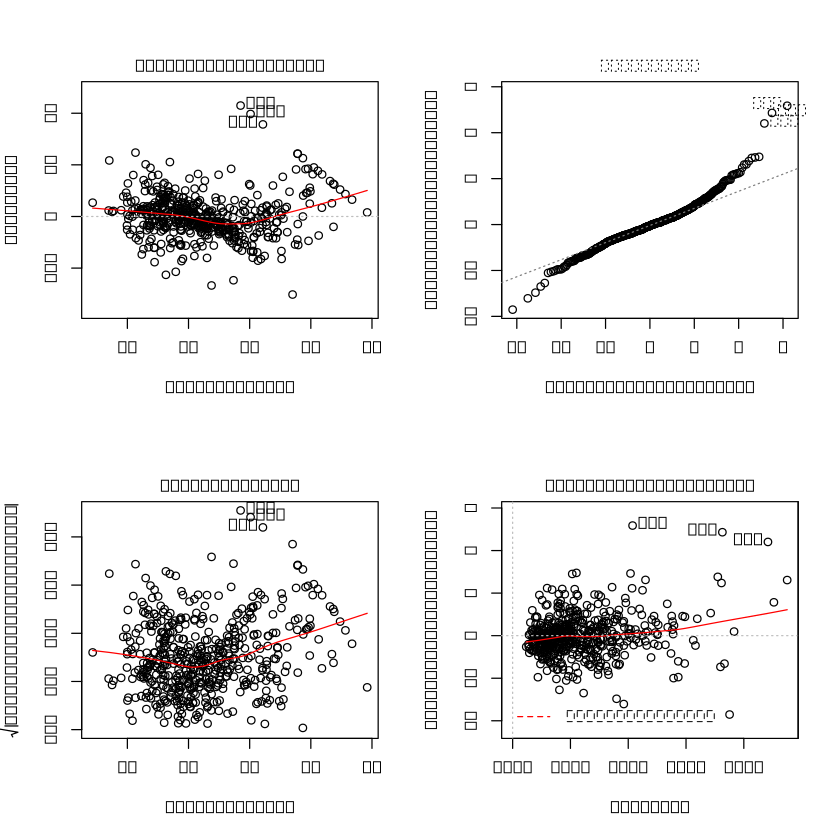

In [7]:
par(mfrow=c(2,2))
plot(m3)

As we can see, the residual plot(the first one) has slightly quadratic pattern, which means the liear assumption in the model is not satisfied. Therefore we considered transforming y via squart root, and call the new model m4.

In [8]:
m4<-lm(sqrt(CMEDV)~log(CRIM)+RM+INDUS+log(LSTAT)+LON+PTRATIO+NOX+CHAS+
         TAX+I(1/DIS)+I(B^2), data=dat)
summary(m4)


Call:
lm(formula = sqrt(CMEDV) ~ log(CRIM) + RM + INDUS + log(LSTAT) + 
    LON + PTRATIO + NOX + CHAS + TAX + I(1/DIS) + I(B^2), data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61191 -0.22550 -0.00787  0.21057  2.06561 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.631e+01  2.090e+01  -2.694 0.007291 ** 
log(CRIM)    1.805e-02  2.055e-02   0.878 0.380110    
RM           2.658e-01  3.795e-02   7.004 8.15e-12 ***
INDUS       -1.846e-03  5.329e-03  -0.346 0.729167    
log(LSTAT)  -9.107e-01  5.362e-02 -16.986  < 2e-16 ***
LON         -8.824e-01  2.928e-01  -3.014 0.002713 ** 
PTRATIO     -5.180e-02  1.182e-02  -4.382 1.44e-05 ***
NOX         -1.148e+00  3.752e-01  -3.060 0.002337 ** 
CHAS         2.367e-01  7.897e-02   2.998 0.002858 ** 
TAX         -8.406e-04  2.234e-04  -3.763 0.000188 ***
I(1/DIS)     1.285e+00  2.080e-01   6.179 1.35e-09 ***
I(B^2)       1.920e-06  5.414e-07   3.546 0.000428 ***
---
Signif. codes:  0 ‘

We can see in m4 that r-squared stays at 0.79. Next we checked the model assumptions:

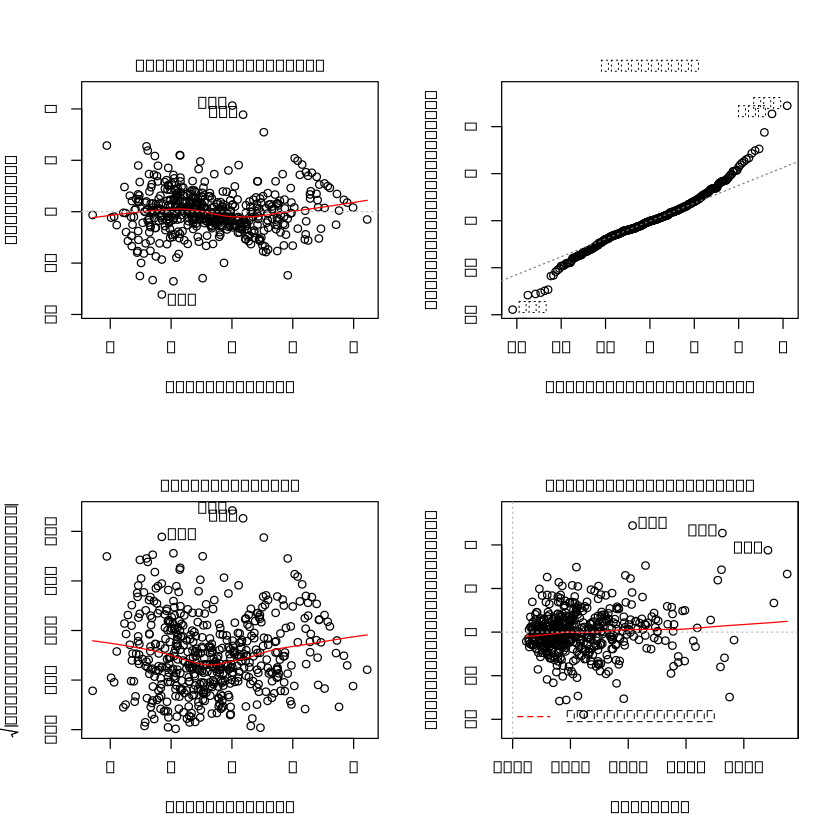

In [9]:
par(mfrow=c(2,2))
plot(m4)

We can see the residual plot(first plot) has no significant patter, thus linear assumption is satisfied. However, we've noticed that the assumption of nomrality of error is violated as the normal QQ plot of standardized residual(3rd plot) has heavy tails, which means that the confidence interval of the coefficients are in doubt. However, the model still makes good prediction of the data. Therefore, we conclude m4 is our final model. 

In [10]:
%load_ext rpy2.ipython

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %load_ext rpy2.ipython
    ^


## Predicting Boston Housing Prices with Machine Learning

In this project, there will be evaluated the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
df = pd.read_csv("Data/boston_corrected_raw.csv")

r_num=pd.read_csv('1e-12_tests.csv')
r_num=r_num[r_num['first variable']=='CMEDV']
feature_values=r_num.nlargest(3,'r')['second variable'].tolist()
r_num.nlargest(3,'r')

#Build crime and features dataframe
price=df['CMEDV']
print('')

features = df[['RM','LSTAT','PTRATIO']]
print(features.head())

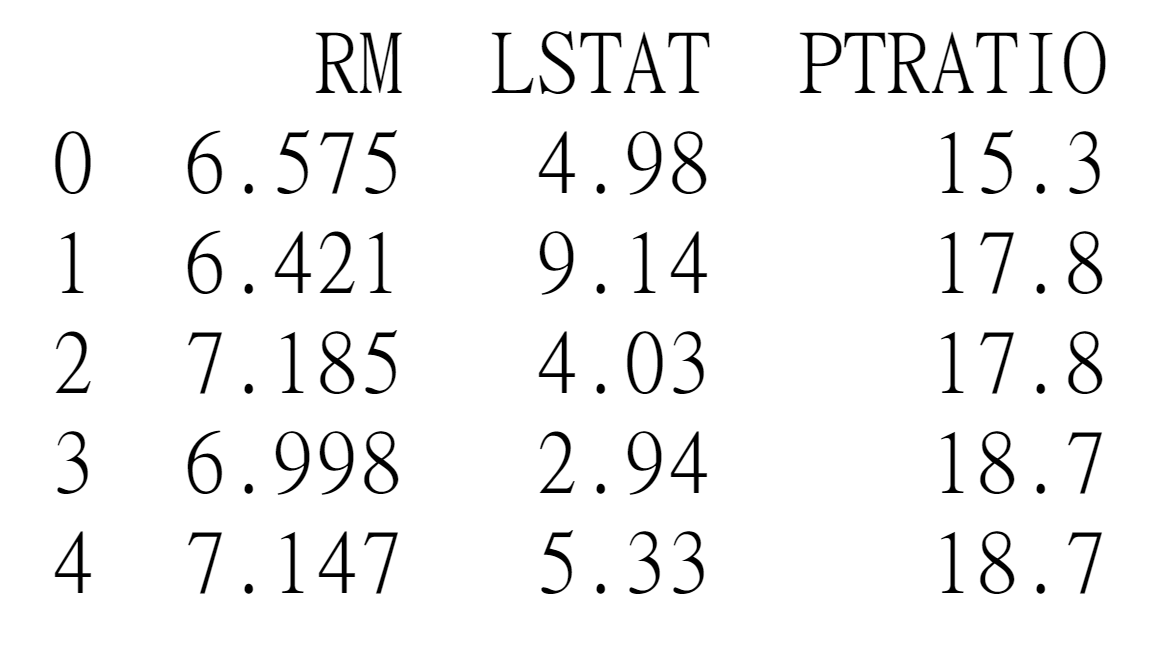

Inspecting the aboved mentioned R figure, we found out that unlike the other graghs, housing price shows positive proportionality with several other features. Therefore we printed out all the numerical proportionality coeffecients and identified RM (i.e., Average numbers of rooms per dwelling), LSTAT (i.e., percentage values of lower status population), PTRATIO (i.e., pupil-teacher ratios per town).

In [ ]:
sns.regplot(x=features['RM'],y=price,color='c')
sns.set_style("whitegrid")

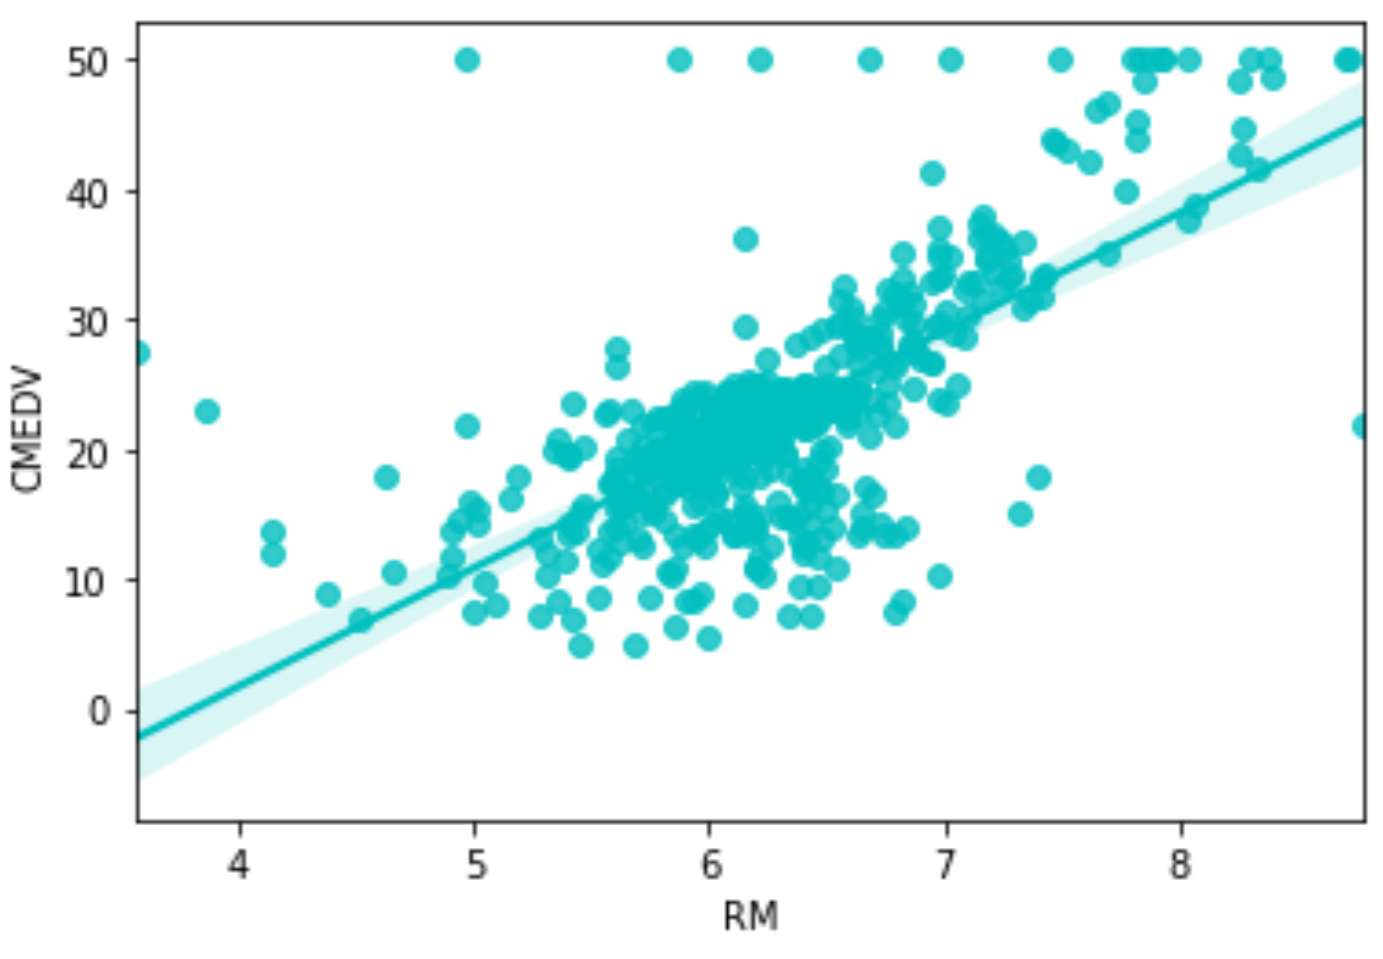

In [ ]:
sns.regplot(x=features['LSTAT'],y=price,color='c')
sns.set_style("whitegrid")

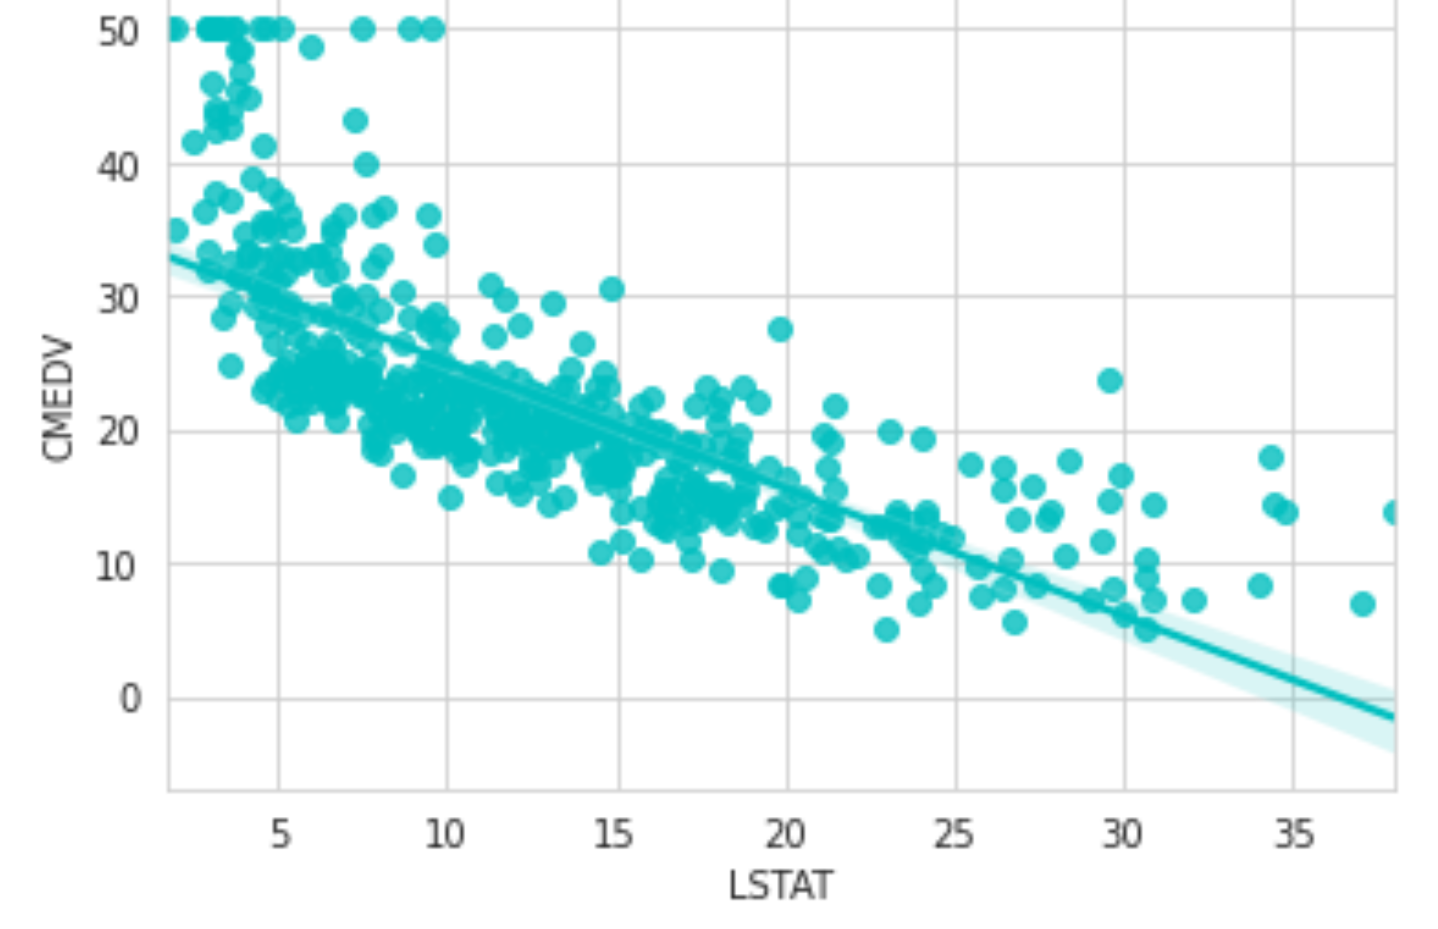

In [ ]:
sns.regplot(x=features['PTRATIO'],y=price,color='c')
sns.set_style("whitegrid")

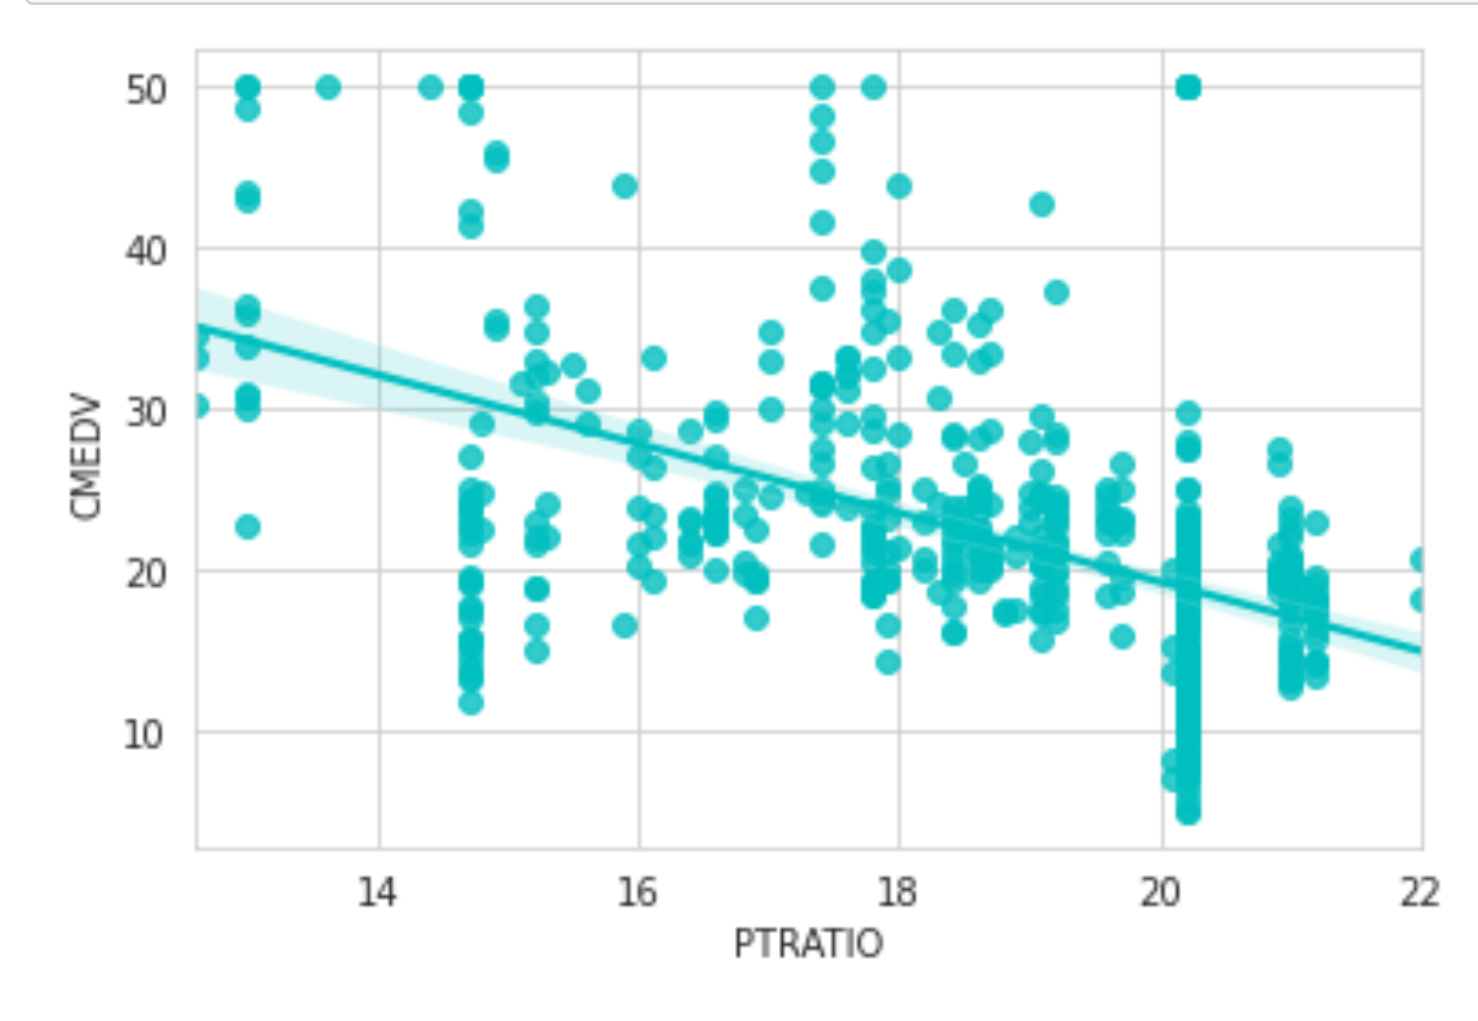

Here we printed three regression plots with price as y, and the features as x. They enhanced our confidence of their postive proportionality.

# Developing a Model

# Performance Matics
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric. For this project, we calculated the coefficient of determination, R^2, to quantify the model's performance. The value for R^2 ranges from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

In [ ]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# Split the Training Data
With help of the Python train_test_split function, we split the training data into a random state with testing data being 20 percent and training data being 80 percent of the total data set

In [ ]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

features
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

# Analyzing Model Performance

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the, the shaded regions of both the learning curves and the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

In [ ]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, price)

In [ ]:
vs.ModelComplexity(X_train, y_train)

From the complexity curve, we can infer that the best maximum depth for the model is 4, as it is the one that yields the best validation score. In addition, for more depth although the training score increases, validation score tends to decrease which is a sign of overfitting.

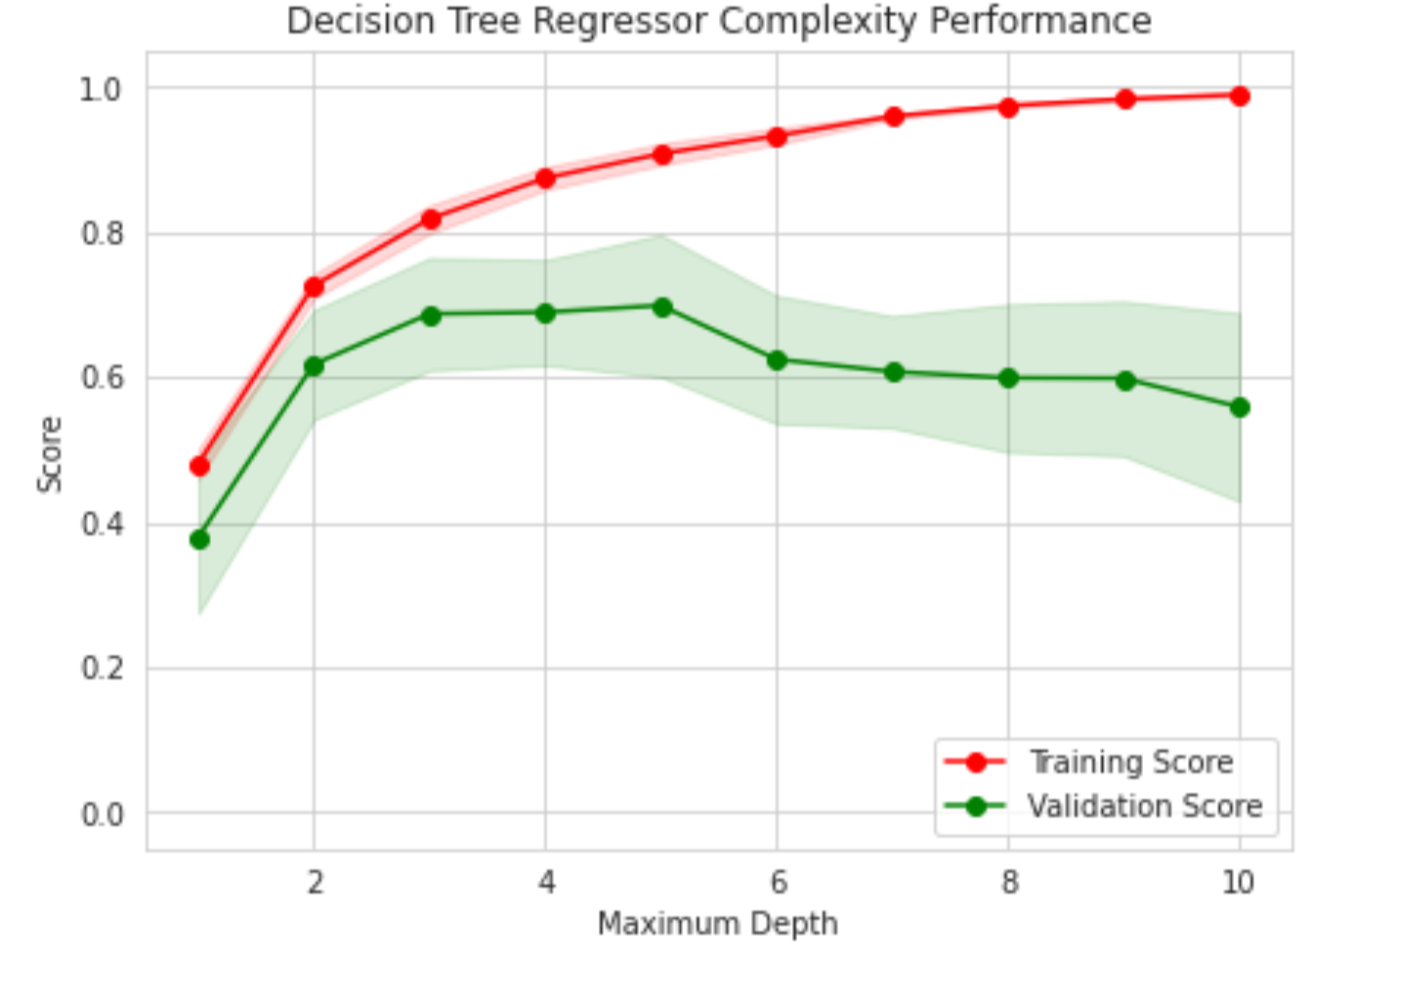

# Implementing the Fitting Model
The final implementation requires bringing everything together and train a model using the decision tree algorithm. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In addition, we will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set.

In [ ]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

# Testing
We gave the parameters of three hypothetical clients to our model and compare the predictions to the statistics of the data set for the sake of testing. 

In [ ]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]] # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted housing price for Client {}'s home: ${:,.2f}".format(i+1, price))

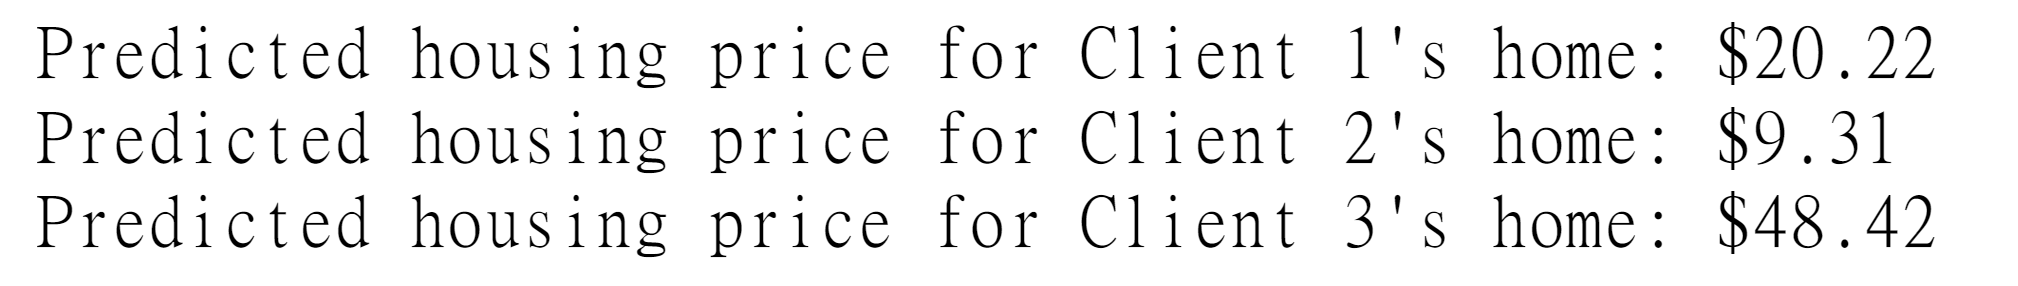

In [ ]:
# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = np.mean(price)

# Median price of the data
median_price = np.median(price)

# Standard deviation of prices of the data
std_price = np.std(price)

# Show the calculated statistics
print("Statistics for housing price:\n")
print("Minimum housing price: ${}".format(minimum_price)) 
print("Maximum houseing price: ${}".format(maximum_price))
print("Mean housing price: ${}".format(mean_price))
print("Median housing price ${}".format(median_price))
print("Standard deviation of housing price: ${}".format(std_price))

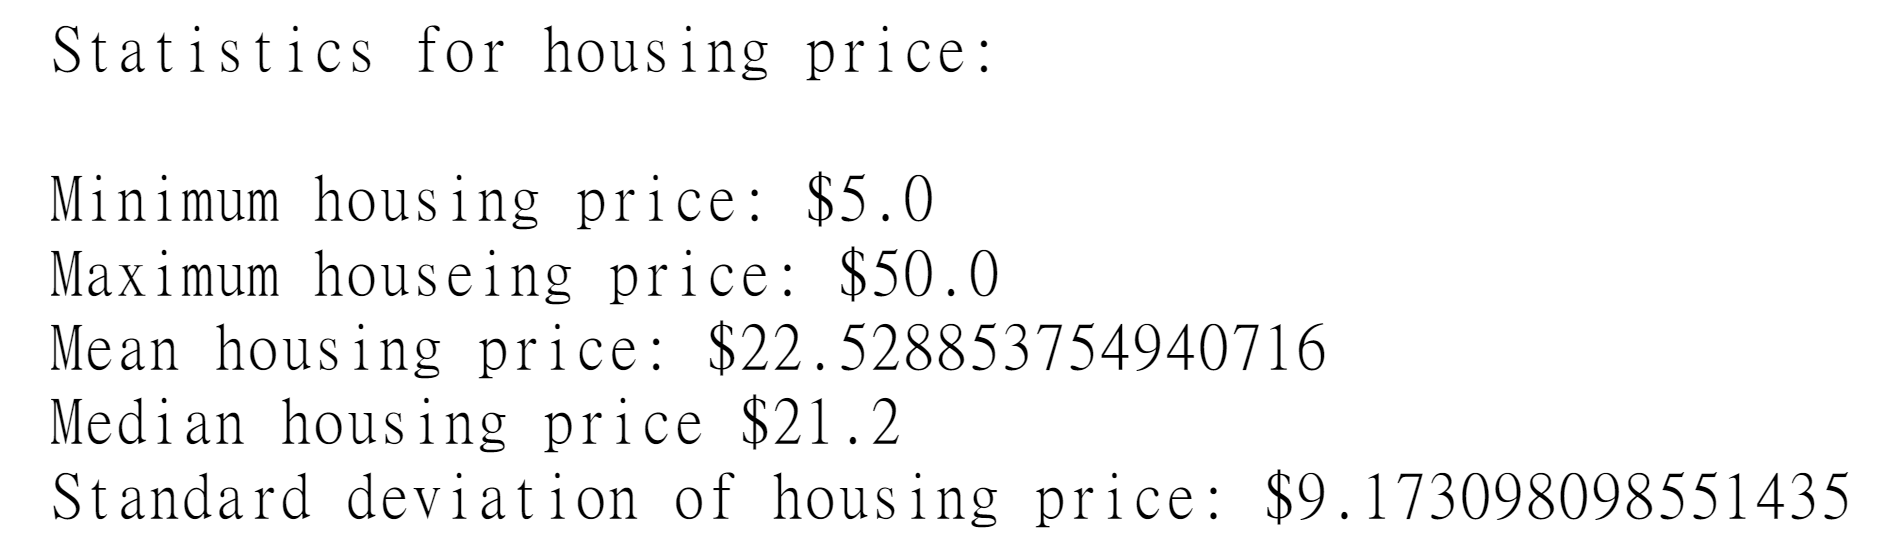

# Result

    •	The first thing we noticed is that the predicted housing price for the third client is far higher the the other clients and is near the maximun housing price. This is reasonable because out of the three clients, it has the greatest number of rooms, lowest percentage of lower status population around the area and the lowest number of pupil-teacher ratio in town. This house may be situated in a wealther neighborhood.
    •	For client 1, we can see that its features are intermediate between the latter 2, and therefore, its price is quite near the mean and median.
    •	Selling price for client 2 is the lowest of the three and given its features is reasonable as it is near the minimum of the dataset.